In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
a=pd.read_csv("C:/Users/user/Desktop/data_sets/mohan_project/train-data.csv")
a

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [17]:
a.shape

(6019, 14)

In [18]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [19]:
a.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [20]:
#preprocessing:
#null values:
a.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [21]:
a=a.dropna()
a.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [22]:
a=a.drop(["Unnamed: 0","New_Price","Name"],axis=1)
a.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
10,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,9.95
15,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,15.00
20,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,18.55


In [23]:
#preprocessing:
a.Engine=a.Engine.str.replace("CC","")
a.Engine=a.Engine.astype(float)
a.Power=a.Power.str.replace("bhp","")
a.Power=a.Power.astype(float)
a.Mileage=a.Mileage.str.replace("km/kg","")
a.Mileage=a.Mileage.str.replace('kmpl','')
a.Mileage=a.Mileage.astype(float)

In [24]:
#eda
a.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50
10,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,9.95
15,Delhi,2014,110000,Diesel,Manual,First,13.50,2477.0,175.56,7.0,15.00
20,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.00,5.0,18.55


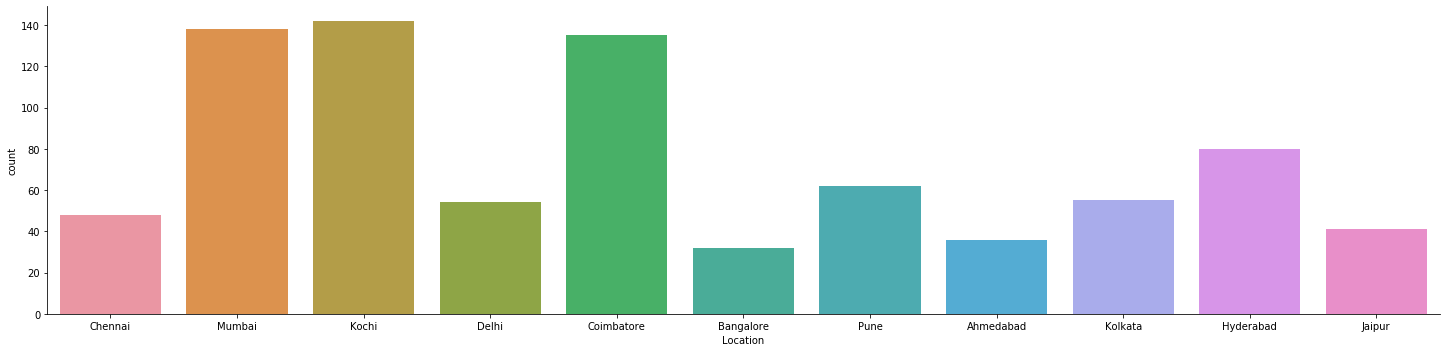

In [25]:
#Categorical variables:
#Location:
#Barplot analysis:
sns.catplot(x="Location",kind="count",data=a,aspect=2*2)

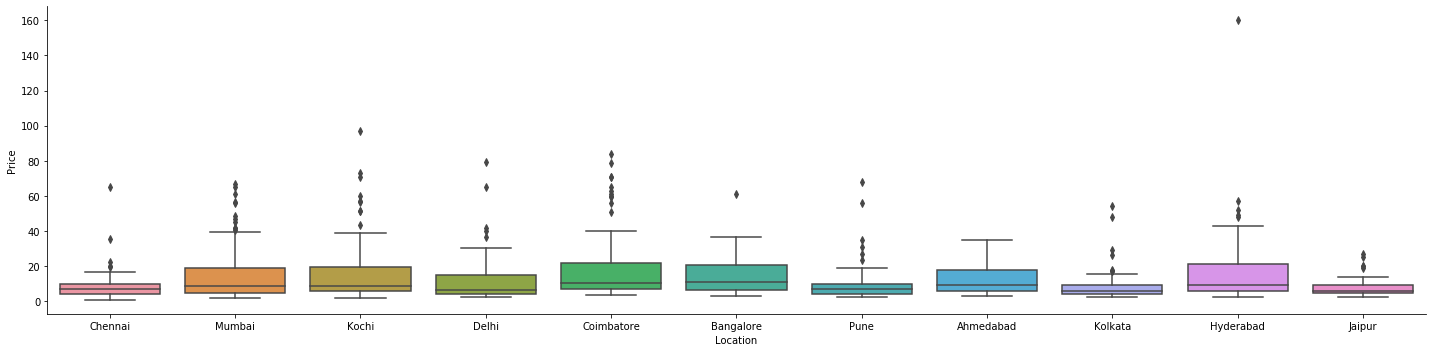

In [26]:
#boxplot analysis- $price:
sns.catplot(x="Location",y="Price",kind="box",data=a,aspect=2*2)

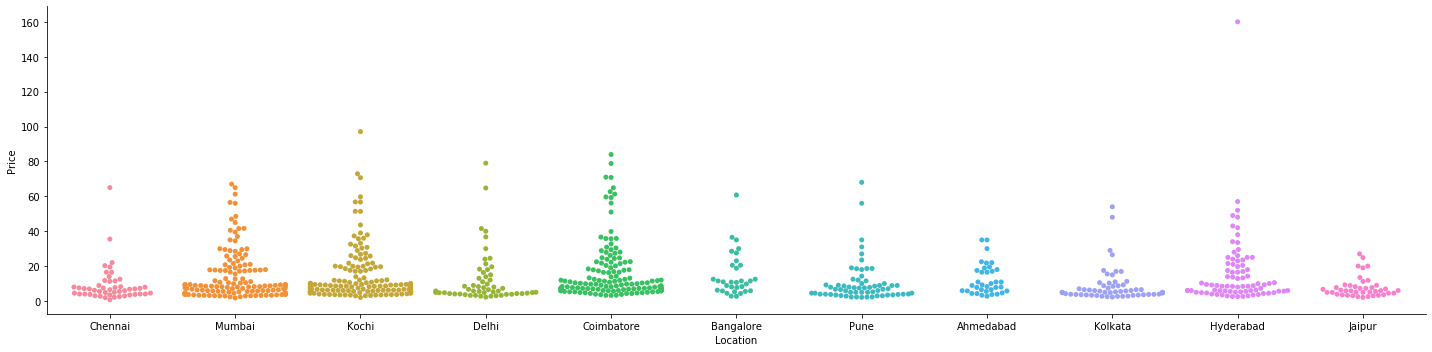

In [27]:
#swarmplot analysis-$price
sns.catplot(x="Location",y="Price",kind="swarm",data=a,aspect=2*2)

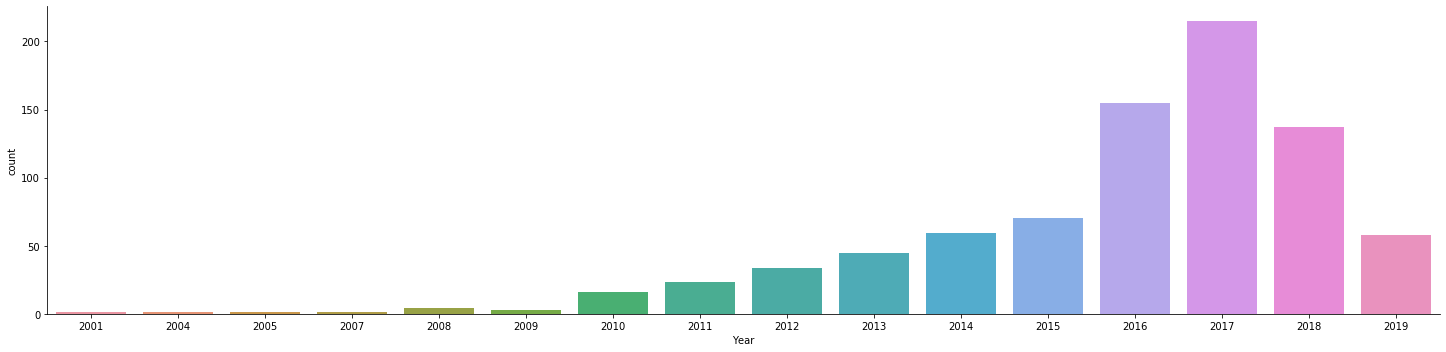

In [28]:
#Year
sns.catplot(x="Year",data=a,kind="count",aspect=2*2)

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')

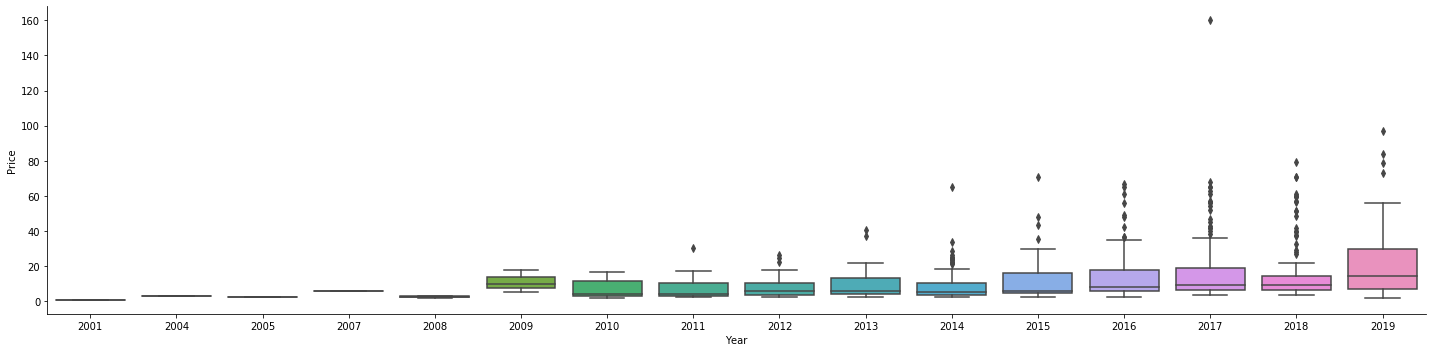

In [29]:
sns.catplot(x="Year",y="Price",kind="box",data=a,aspect=2*2)
a.columns

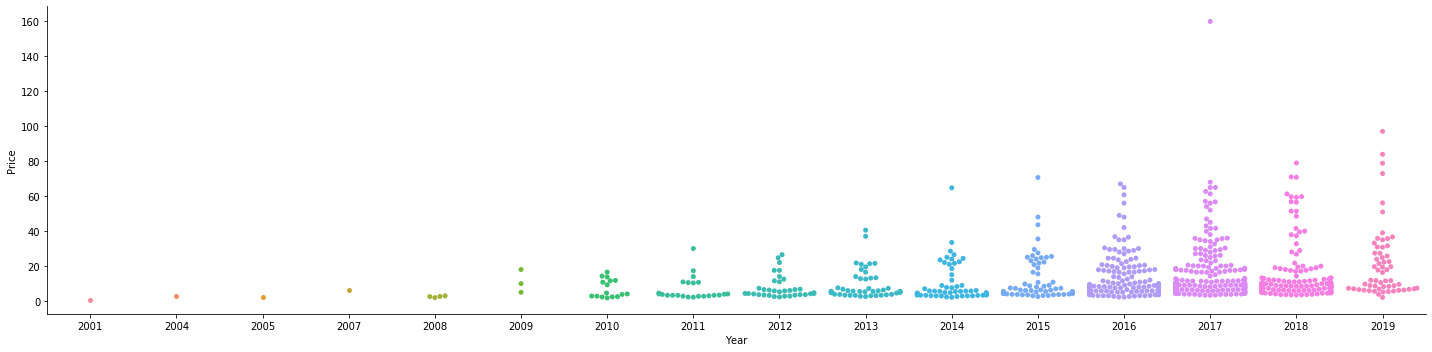

In [30]:
sns.catplot(x="Year",y="Price",kind="swarm",data=a,aspect=2*2)

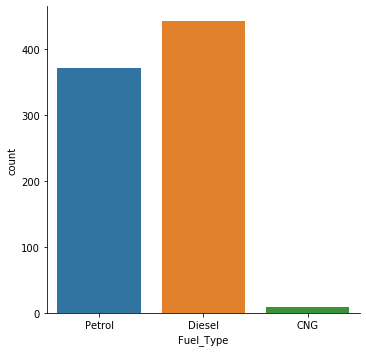

In [31]:
#Fuel type:
sns.catplot(x="Fuel_Type",data=a,kind="count")

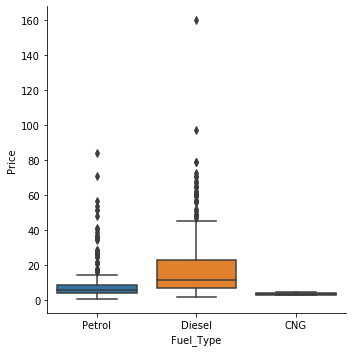

In [32]:
sns.catplot(x="Fuel_Type",y="Price",kind="box",data=a)

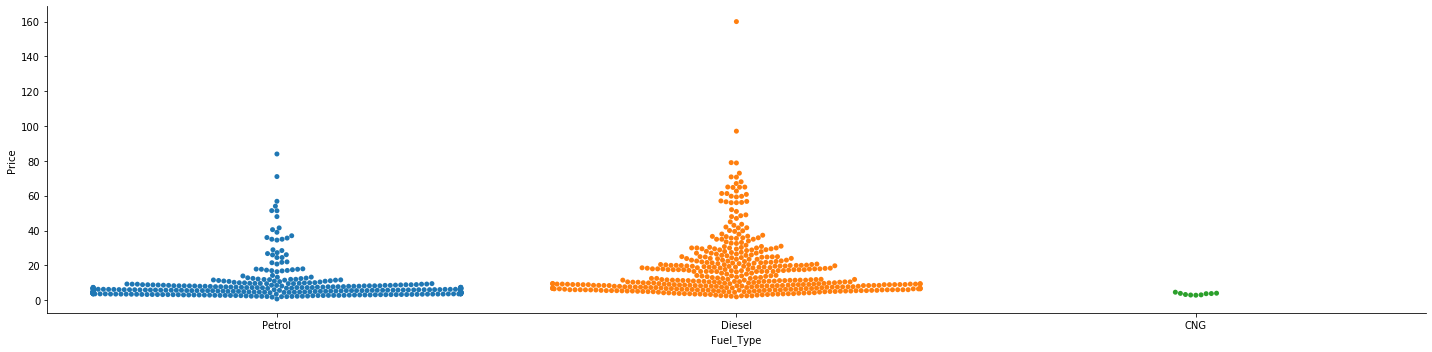

In [33]:
sns.catplot(x="Fuel_Type",y="Price",kind="swarm",data=a,aspect=2*2)

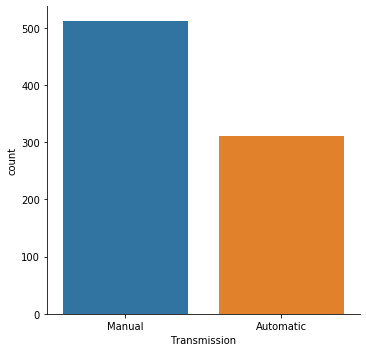

In [34]:
#Transmission:
sns.catplot(x="Transmission",kind="count",data=a)

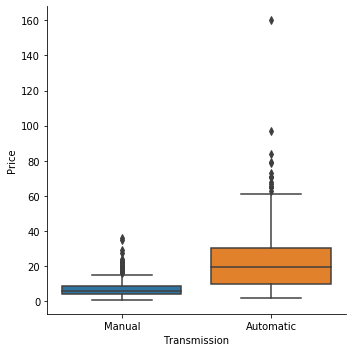

In [35]:
sns.catplot(x="Transmission",y="Price",kind="box",data=a)

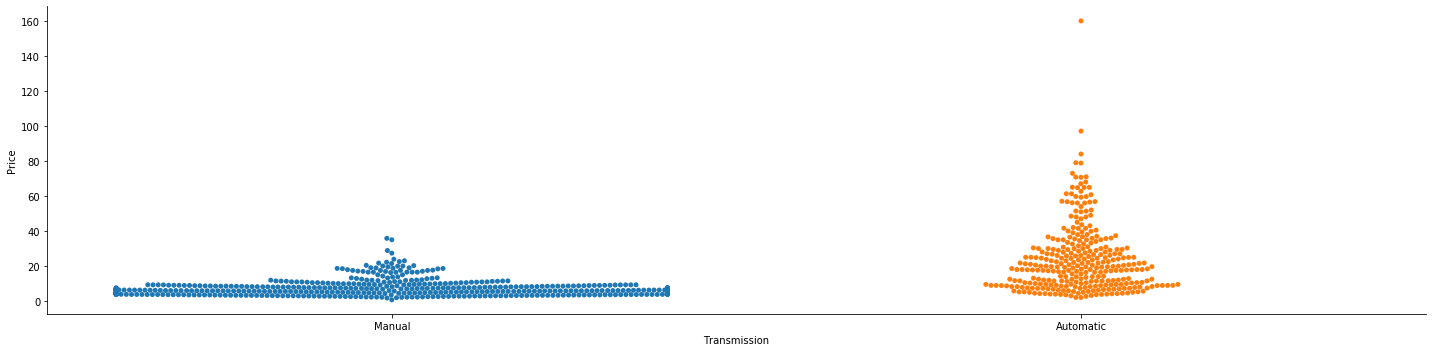

In [36]:
sns.catplot(x="Transmission",y="Price",kind="swarm",data=a,aspect=2*2)

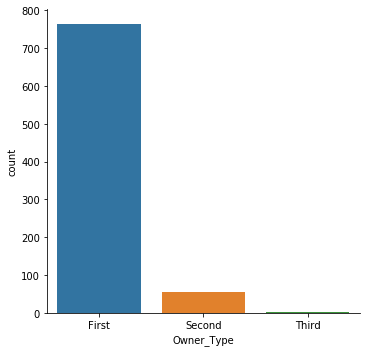

In [37]:
#Owner type:
sns.catplot(x="Owner_Type",kind="count",data=a)

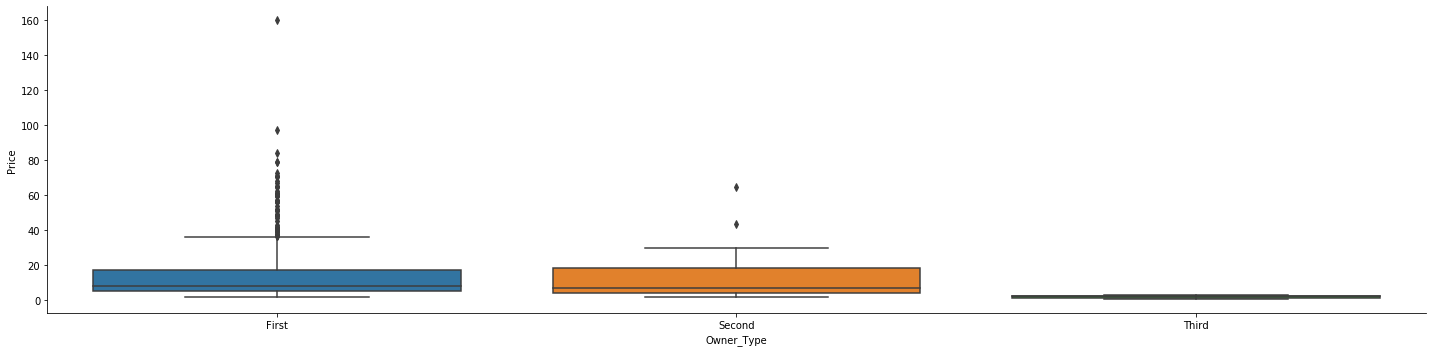

In [38]:
sns.catplot(x="Owner_Type",y="Price",kind="box",data=a,aspect=2*2)

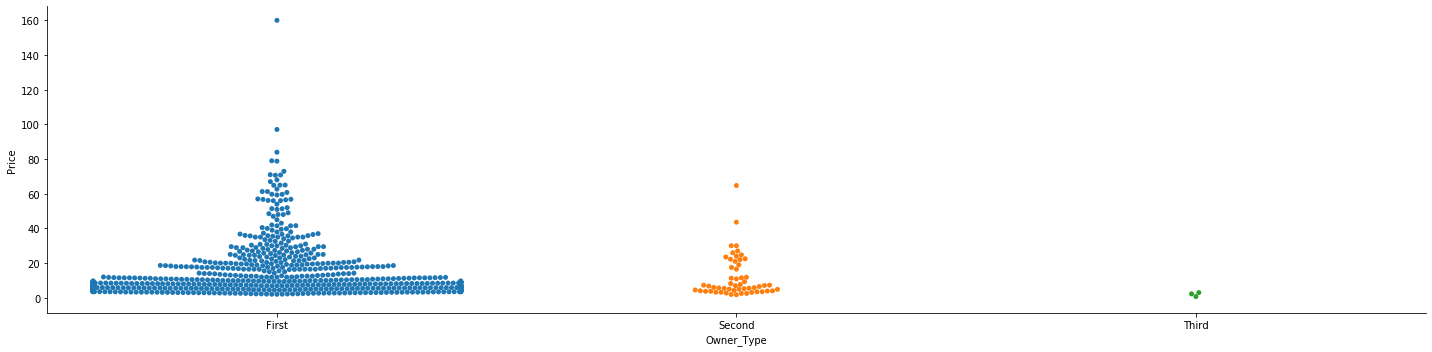

In [39]:
sns.catplot(x="Owner_Type",y="Price",kind="swarm",data=a,aspect=2*2)

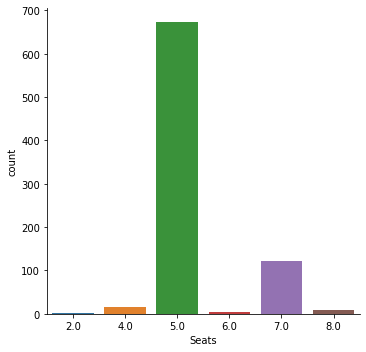

In [40]:
#Seats:
sns.catplot(x="Seats",kind="count",data=a)

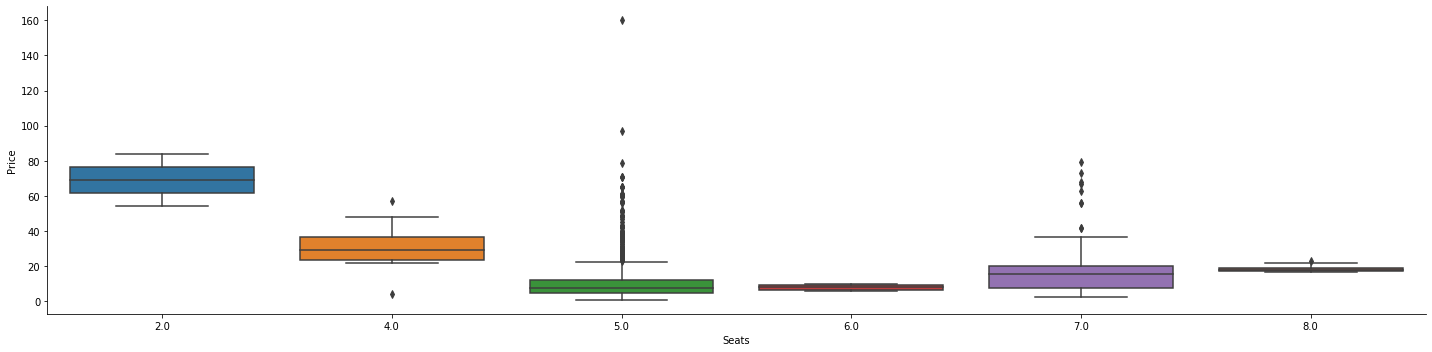

In [41]:
sns.catplot(x="Seats",y="Price",kind="box",data=a,aspect=2*2)

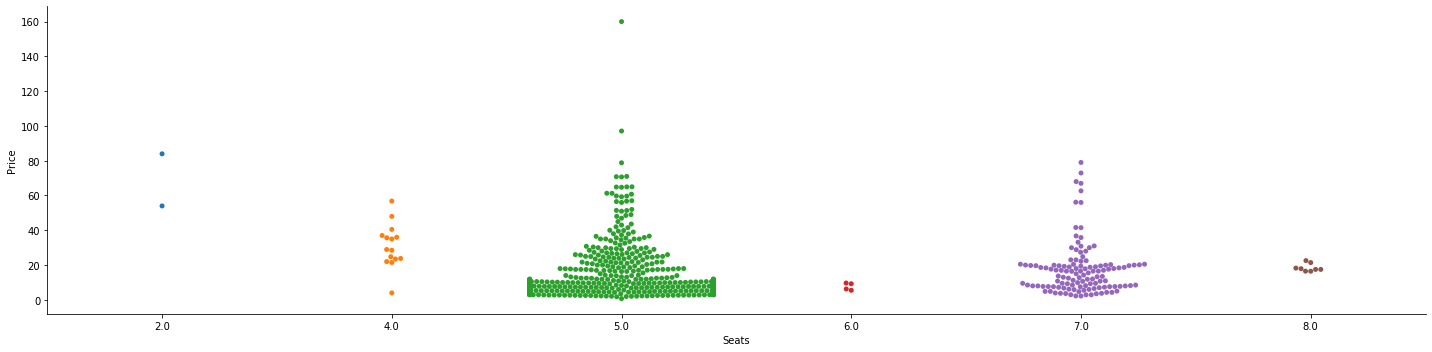

In [42]:
sns.catplot(x="Seats",y="Price",kind="swarm",data=a,aspect=2*2)

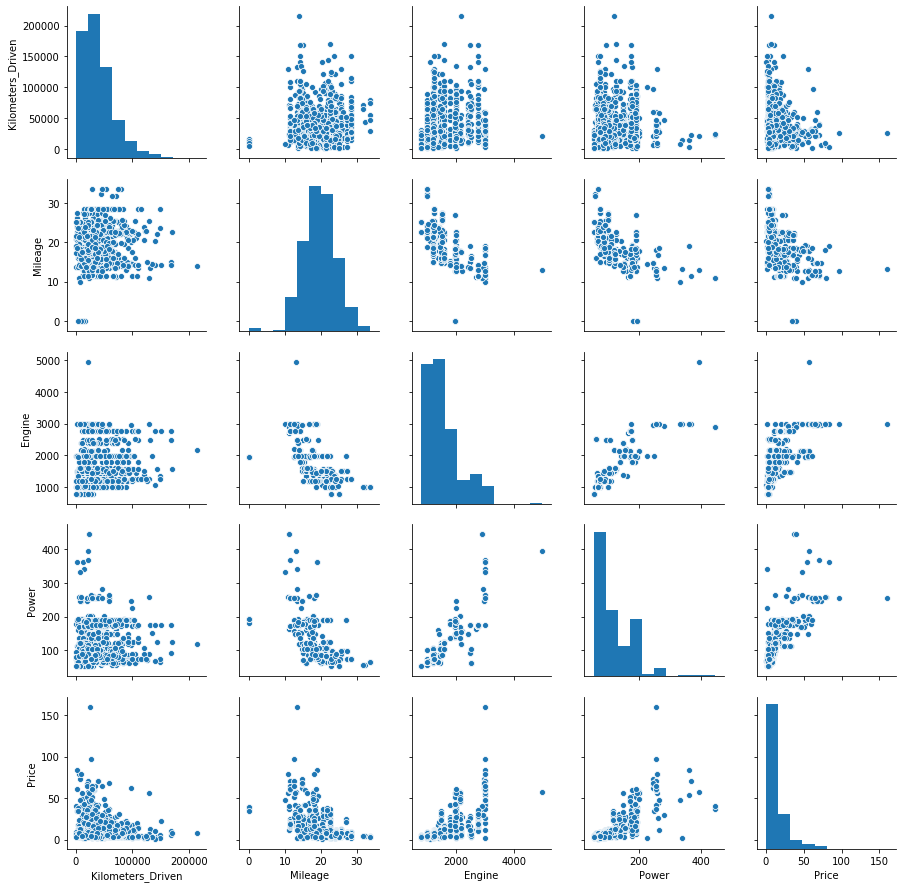

In [43]:
b=a.drop([ 'Location', 'Year', 'Fuel_Type',
       'Transmission', 'Owner_Type',  'Seats'],axis=1)
sns.pairplot(b)

In [44]:
#filling categorical variables:
b = []
unG = a.Location.unique()
for i,var in enumerate(unG):
    z = tuple([var])
    z = z + (i,)
    b.append(z)
dictG = dict(b)
print(dictG)

{'Chennai': 0, 'Mumbai': 1, 'Kochi': 2, 'Delhi': 3, 'Coimbatore': 4, 'Bangalore': 5, 'Pune': 6, 'Ahmedabad': 7, 'Kolkata': 8, 'Hyderabad': 9, 'Jaipur': 10}


In [45]:
a.Location = a.Location.map(dictG)

In [46]:
b = []
unG = a.Fuel_Type.unique()
for i,var in enumerate(unG):
    z = tuple([var])
    z = z + (i,)
    b.append(z)
dictG = dict(b)
print(dictG)

{'Petrol': 0, 'Diesel': 1, 'CNG': 2}


In [47]:
a.Fuel_Type = a.Fuel_Type.map(dictG)

In [48]:
b = []
unG = a.Transmission.unique()
for i,var in enumerate(unG):
    z = tuple([var])
    z = z + (i,)
    b.append(z)
dictG = dict(b)
print(dictG)

{'Manual': 0, 'Automatic': 1}


In [49]:
a.Transmission = a.Transmission.map(dictG)

In [50]:
b = []
unG = a.Owner_Type.unique()
for i,var in enumerate(unG):
    z = tuple([var])
    z = z + (i,)
    b.append(z)
dictG = dict(b)
print(dictG)

{'First': 0, 'Second': 1, 'Third': 2}


In [51]:
a.Owner_Type = a.Owner_Type.map(dictG)

In [52]:
a.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,0,2011,46000,0,0,0,18.20,1199.0,88.70,5.0,4.50
7,1,2016,36000,1,1,0,11.36,2755.0,171.50,8.0,17.50
10,2,2018,25692,0,0,0,21.56,1462.0,103.25,5.0,9.95
15,3,2014,110000,1,0,0,13.50,2477.0,175.56,7.0,15.00
20,2,2014,32982,1,1,0,22.69,1995.0,190.00,5.0,18.55


In [53]:
#splitting x , y:
x=a.drop(["Price"],axis=1)
y=a["Price"]

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9)

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression,ARDRegression,HuberRegressor
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor

In [56]:
#pip install xgboost

In [57]:
from xgboost import XGBRFRegressor,XGBRegressor

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
lr=cross_val_score(LinearRegression(),x_train,y_train,cv=5)
adr=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5)
hur=cross_val_score(HuberRegressor(),x_train,y_train,cv=5)
adb=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5)
etr=cross_val_score(ExtraTreesRegressor(),x_train,y_train,cv=5)
br=cross_val_score(BaggingRegressor(),x_train,y_train,cv=5)
gbr=cross_val_score(GradientBoostingRegressor(),x_train,y_train,cv=5)
rfr=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5)
xgbr=cross_val_score(XGBRFRegressor(),x_train,y_train,cv=5)
xgb=cross_val_score(XGBRegressor(),x_train,y_train,cv=5)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

[18:00:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:01:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:01:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:01:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [60]:
print('lr',lr,lr.mean())
print('adr',adr,adr.mean())
print('hur',hur,hur.mean())
print('adb',adb,adb.mean())
print('etr',etr,etr.mean())
print('br',br,br.mean())
print('gbr',gbr,gbr.mean())
print('rfr',rfr,rfr.mean())
print('xgbr',xgbr,xgbr.mean())
print('xgb',xgb,xgb.mean())

lr [0.561522   0.786401   0.76088026 0.71085586 0.75485264] 0.7149023509637777
adr [0.72940659 0.76213399 0.71551292 0.77239813 0.7683029 ] 0.7495509053208461
hur [0.47573617 0.7055976  0.68112925 0.62470853 0.64162652] 0.6257596133812571
adb [0.69728943 0.80563315 0.74362374 0.76136494 0.81626303] 0.7648348593432546
etr [0.72514653 0.88579365 0.88773021 0.94477684 0.8897786 ] 0.8666451647096183
br [0.68161866 0.79534991 0.84312982 0.88735942 0.87569958] 0.8166314764955859
gbr [0.74456268 0.84041979 0.87229444 0.95004123 0.87204104] 0.8558718358844235
rfr [0.70741712 0.84255262 0.86774065 0.90538296 0.77459385] 0.8195374383229762
xgbr [0.65273362 0.83471869 0.83655945 0.8392891  0.76387297] 0.7854347672743085
xgb [0.73207869 0.86583648 0.8725006  0.9431645  0.90030659] 0.8627773739482425


In [61]:
lm=RandomForestRegressor(n_estimators=400,max_depth=1)
model=lm.fit(x_train,y_train)
pred=model.predict(x_test)
model
pred
#accuracy:
from sklearn.metrics import r2_score
print("r sq value : " ,r2_score(y_pred=pred,y_true=y_test))
#rmse score:
print("rmse score: ",np.mean((pred-y_test)**2))

r sq value :  0.4582285294505648
rmse score:  88.28069973542165


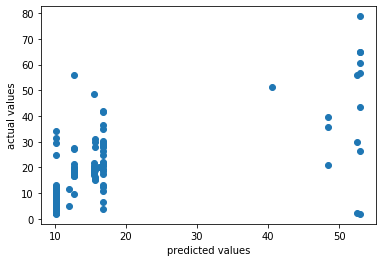

In [62]:
plt.scatter(pred,y_test)
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.show()

In [63]:
#checking multicollinearity:
corr_x=x.corr(method='pearson')
corr_x

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
Location,1.000000,-0.034564,0.110650,0.129207,-0.125174,-0.081225,0.103455,-0.006755,-0.063245,0.016281
Year,-0.034564,1.000000,-0.520334,-0.026708,0.070032,-0.322908,-0.116559,0.016253,-0.017271,0.074964
Kilometers_Driven,0.110650,-0.520334,1.000000,0.286338,-0.139881,0.227904,0.042783,0.129182,0.006821,0.212490
Fuel_Type,0.129207,-0.026708,0.286338,1.000000,0.090938,0.007076,0.175199,0.407238,0.257882,0.248999
Transmission,-0.125174,0.070032,-0.139881,0.090938,1.000000,0.017727,-0.321104,0.470911,0.594389,-0.043644
Owner_Type,-0.081225,-0.322908,0.227904,0.007076,0.017727,1.000000,-0.025706,0.033981,0.026171,-0.003349
Mileage,0.103455,-0.116559,0.042783,0.175199,-0.321104,-0.025706,1.000000,-0.633602,-0.540167,-0.393457
Engine,-0.006755,0.016253,0.129182,0.407238,0.470911,0.033981,-0.633602,1.000000,0.853957,0.414706
Power,-0.063245,-0.017271,0.006821,0.257882,0.594389,0.026171,-0.540167,0.853957,1.000000,0.077125
Seats,0.016281,0.074964,0.212490,0.248999,-0.043644,-0.003349,-0.393457,0.414706,0.077125,1.000000


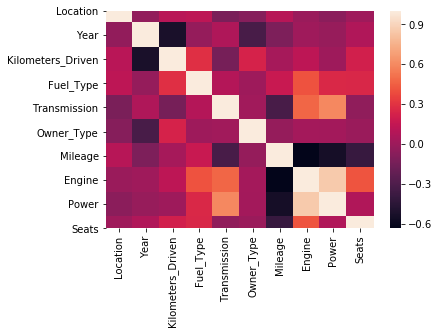

In [64]:
sns.heatmap(corr_x)

In [65]:
#dropping year and kms driven attribute:
x5=x.drop(["Year","Kilometers_Driven"],axis=1)
x5_train,x5_test,y_train,y_test=train_test_split(x5,y,test_size=0.3,random_state=12)
lmm=LinearRegression()
model5=lmm.fit(x5_train,y_train)
pred5=model5.predict(x5_test)
print("R sq val : ",r2_score(y_pred=pred5,y_true=y_test))

R sq val :  0.6827890088077324


In [67]:
#Least square method:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model1=sm.OLS(y_train,x_train)
result=model1.fit(X=x_train,y=y_train)
print(result.summary())

ValueError: The indices for endog and exog are not aligned

In [68]:
#dropping location and year attribute:
x2_train=x_train.drop(["Location","Year"],axis=1)
x2_test=x_test.drop(["Location","Year"],axis=1)
model2=sm.OLS(y_train,x2_train)
result2=model2.fit()
print(result2.summary())

ValueError: The indices for endog and exog are not aligned

In [ ]:
#dropping owner_type attribute:
x3_train=x_train.drop(["Owner_Type"],axis=1)
x3_test=x_test.drop(["Owner_Type"],axis=1)
model3=sm.OLS(y_train,x3_train)
result3=model3.fit()
print(result3.summary())

In [110]:
#Gradient boosting method:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=400,max_depth=1)
model = gb.fit(x_train,y_train)
pred = model.predict(x_test)
acc = r2_score(pred,y_test)
print("R sq val : ", acc)

R sq val :  0.7305229501010942


In [1]:
plt.scatter(pred,y_test)
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.show()

NameError: name 'plt' is not defined